# **visualize_dataset: Visualize Dataset**

This Jupyter Notebook visualizes data from a dataset. It reads a CSV (comma-separated values) file and generates histograms, scatter plots, and a correlation matrix. This code uses parts of Python scripts described in [Géron, 2023](https://www.isbns.net/isbn/9781098125974/). It aims to map the correlation involving features and a target variable. We may employ this code to find the most promising features to build regression models using techniques available in the [Scikit-Learn](https://scikit-learn.org/stable/) library ([Pedregosa et al., 2011](https://doi.org/10.48550/arXiv.1201.0490)).
<br></br>
<img src="https://drive.usercontent.google.com/download?id=1Y8SQ3Tf6uA0aIUoc8RQeCGDjMiUeQSWZ&export=view&authuser=0" width=520 alt="Visualize Dataset">
<br></br><i>
This schematic diagram shows how to visualize a dataset using visualize_dataset. It focuses on a dataset generated using Molegro Virtual Docker ([Thomsen & Christensen, 2006](https://doi.org/10.1021/jm051197e)) to address protein-ligand interactions.
</i><br></br>
**References**
<br></br>
Géron, A. Hands-on Machine Learning with Scikit-Learn, Keras, and TensorFlow 3e: Concepts, Tools, and Techniques to Build Intelligent Systems, 3rd ed.; O’Reilly Media: Sebastopol, CA, 2023.
[ISBN: 978-1-098-12597-4](https://www.isbns.net/isbn/9781098125974/)
<br></br>
Pedregosa F, Varoquaux G, Gramfort A, Michel V, Thirion B, Grisel O, Blondel M, Prettenhofer P, Weiss R, Dubourg V, Verplas J, Passos A, Cournapeau D, Brucher M, Perrot M, Duchesnay E. Scikitlearn: Machine Learning in Python. J Mach Learn Res., 2011; 12:2825–2830. [DOI: 10.48550/arXiv.1201.0490](https://doi.org/10.48550/arXiv.1201.0490)
<br></br>
Thomsen R, Christensen MH. MolDock: a new technique for high-accuracy molecular docking. J Med Chem. 2006 Jun 1;49(11):3315-21.
[DOI: 10.1021/jm051197e](https://doi.org/10.1021/jm051197e)
[PubMed](https://pubmed.ncbi.nlm.nih.gov/16722650/)
<br></br>
It follows the code.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 47 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   BindingDB Reactant_set_id    138 non-null    int64  
 1   pKi                          138 non-null    float64
 2   C0                           138 non-null    int64  
 3   CO2minus                     138 non-null    int64  
 4   Cofactor (VdW)               138 non-null    int64  
 5   Cofactor (elec)              138 non-null    int64  
 6   Cofactor (hbond)             138 non-null    int64  
 7   Csp2                         138 non-null    int64  
 8   Csp3                         138 non-null    int64  
 9   DOF                          138 non-null    int64  
 10  E-Inter (cofactor - ligand)  138 non-null    int64  
 11  E-Inter (protein - ligand)   138 non-null    float64
 12  E-Inter (water - ligand)     138 non-null    int64  
 13  E-Inter total       

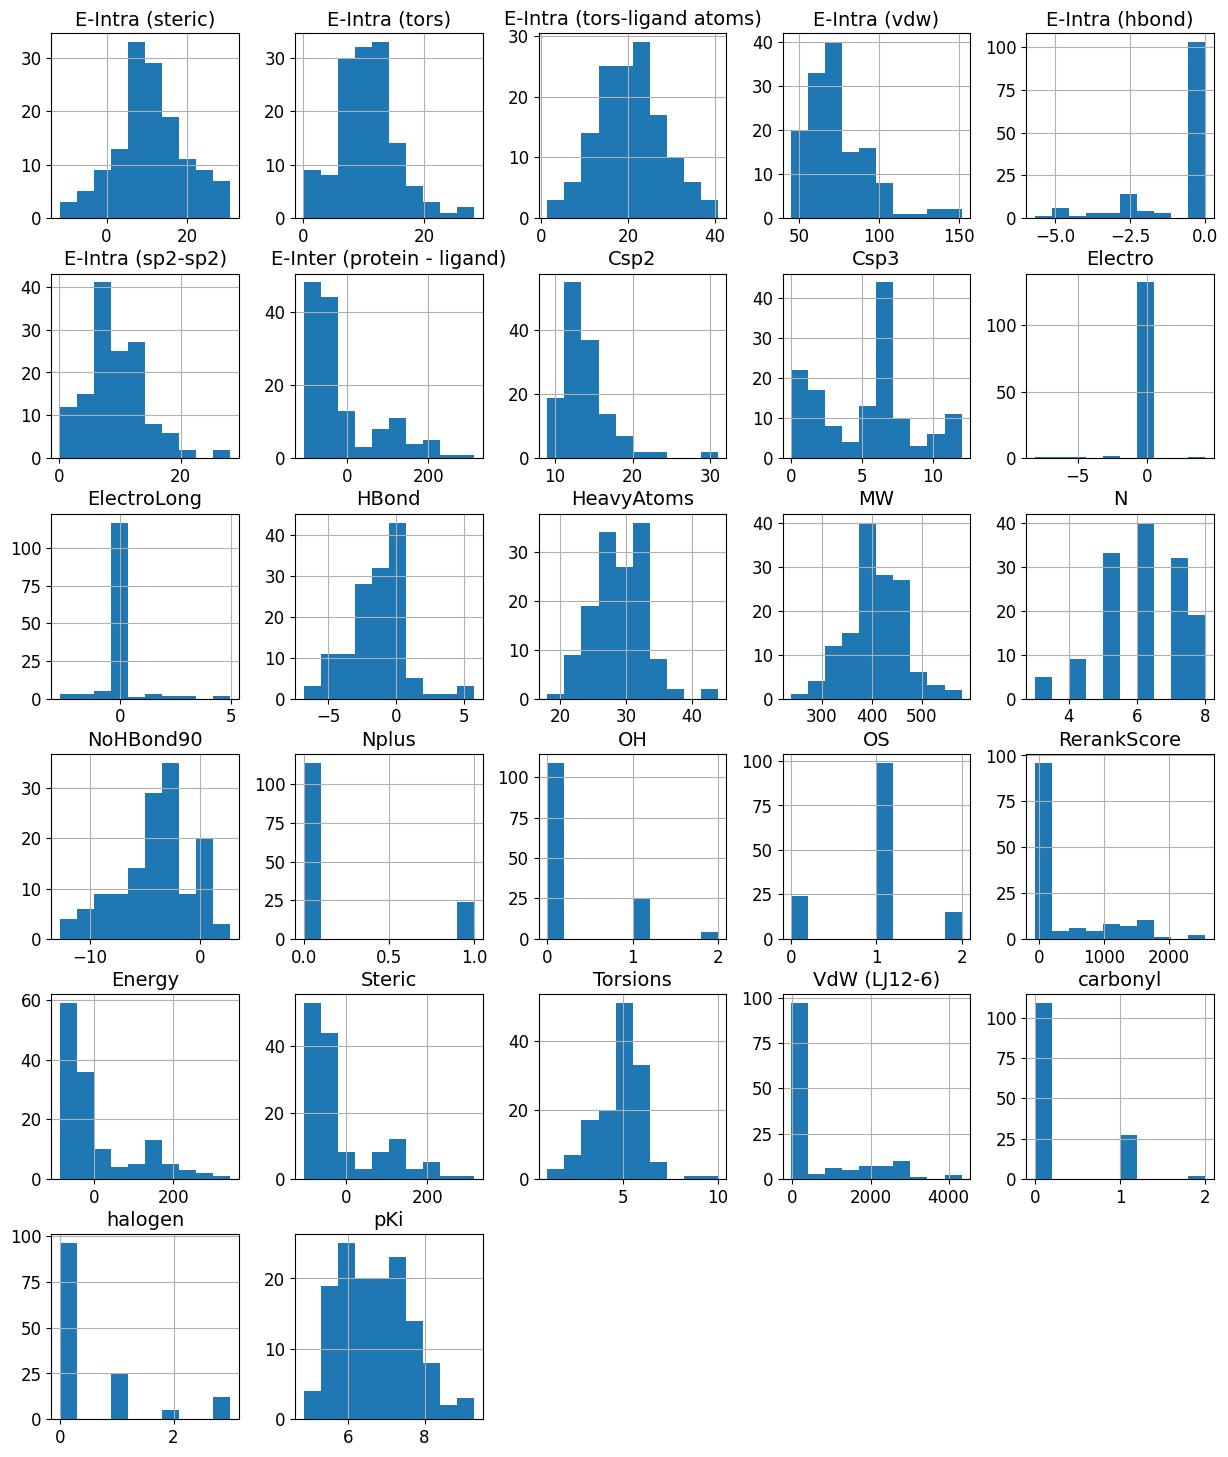

done!
Histograms saved in the file: CDK1_Rerank_Binding_Affinity_histograms.pdf


Generating correlation matrix...

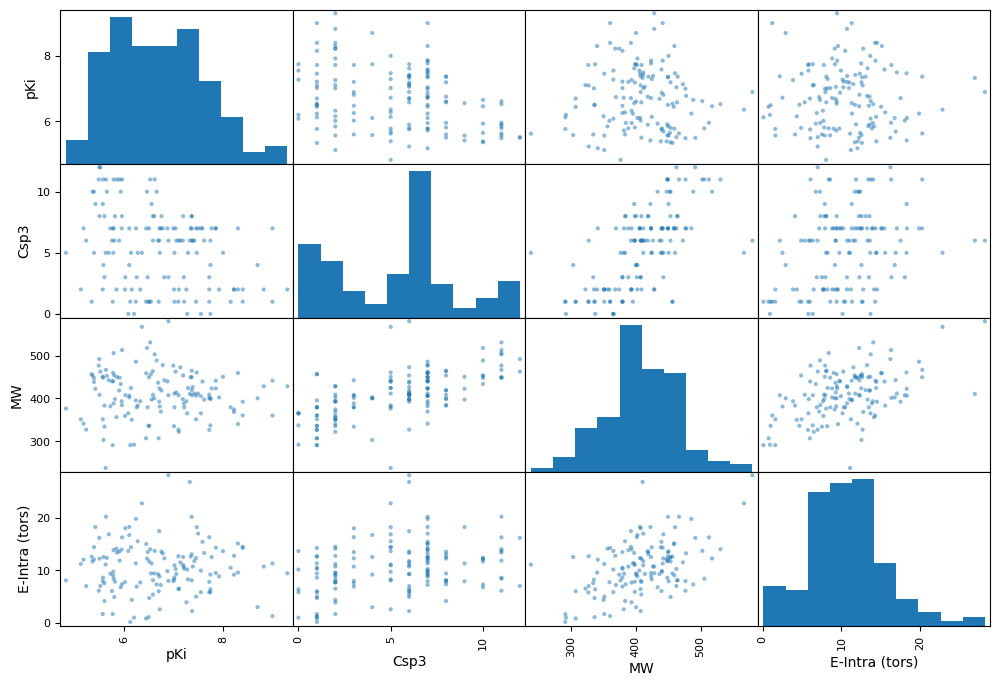

done!
Correlation matrix data saved in the file: CDK1_Rerank_Binding_Affinity_scatter_matrix.csv
Correlation matrix plot saved in the file: CDK1_Rerank_Binding_Affinity_scatter_matrix.pdf


Generating scatter plot...

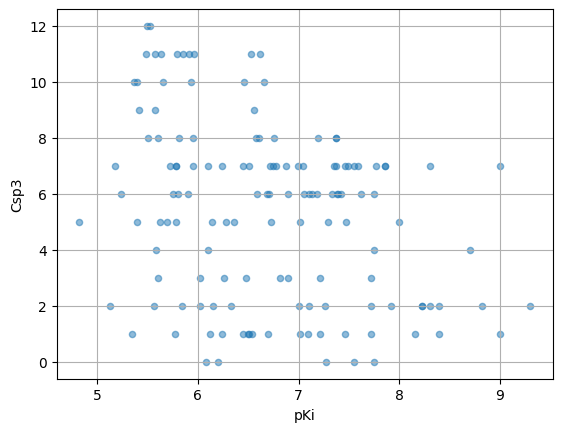

done!

Scatter plot saved in the file:CDK1_Rerank_Binding_Affinity_pKi_vs_Csp3.pdf


In [ ]:
#!/usr/bin/env python3
#
################################################################################
# Dr. Walter F. de Azevedo, Jr.                                                #
# [Scopus](https://www.scopus.com/authid/detail.uri?authorId=7006435557)       #
# [GitHub](https://github.com/azevedolab)                                      #
# January 12, 2025                                                             #
################################################################################
#
################################################################################
# Import section                                                               #
################################################################################
import pandas as pd
from matplotlib import pyplot as plt
from pandas.plotting import scatter_matrix
import warnings

# Ignore warnings
warnings.filterwarnings("ignore")

################################################################################
# Define Dataset() class
################################################################################
class Dataset(object):
    """Class to visualize a dataset (histograms and scattering plots). It also
    generates scattering matrix and scattering plot."""
    # Define constructor method
    def __init__(self,csv_in,csv_id,features4corr,features4hist,attributes,dpi,
                                                                    plt_format):
        """Constructor method"""
        # Define attributes
        self.csv_in = csv_in
        self.csv_id = csv_id
        self.features4corr = features4corr
        self.features4hist = features4hist
        self.attributes = attributes
        self.dpi = dpi
        self.plt_format = plt_format

        # Define strings for Google drive
        self.drive_string1 = "https://drive.usercontent.google.com/u/0/uc?id="
        self.drive_string2 = "&export=download"

    # Define read() method
    def read(self):
        """Method to read a CSV file."""
        # Read it
        url = self.drive_string1+self.csv_id+self.drive_string2
        self.df = pd.read_csv(url, delimiter=",")
        self.df4hist =  self.df[self.features4hist]
        self.df4corr =  self.df[self.features4corr]

        # Show some information regading the data
        data_info = self.df.info()

    # Define histograms() method
    def histograms(self,titlesize,xtick_size,ytick_size,n_bins,fsize_tuple):
        """Method to plot all histograms in one plot."""
        # Generate histograms
        print("\n\nGenerating histograms",end="...")
        plt.rc('axes', titlesize=titlesize)
        plt.rc('xtick', labelsize=xtick_size)
        plt.rc('ytick', labelsize=ytick_size)
        self.df4hist.hist(bins=n_bins, figsize=fsize_tuple)
        hist_file = self.csv_in.replace(".csv","_histograms."+self.plt_format)
        plt.savefig("/content/"+hist_file,dpi=self.dpi)
        plt.show()
        plt.close()
        print("done!")
        msg_out = "Histograms saved in the file: "+hist_file
        print(msg_out)

    # Define correlation_matrix() method
    def correlation_matrix(self,target_variable,corr_fig_size_tuple):
        """Method to generate correlation matrix and plot."""
        # Correlation
        print("\n\nGenerating correlation matrix",end="...")
        corr_matrix = self.df4corr.corr()
        corr_matrix[target_variable].sort_values(ascending=False)
        scatter_matrix_file = self.csv_in.replace(".csv","_scatter_matrix.csv")
        corr_matrix.to_csv(scatter_matrix_file, sep=',',index=False,
                                                            encoding='utf-8')
        scatter_matrix_plt = self.csv_in.replace(".csv",
                                            "_scatter_matrix."+self.plt_format)
        scatter_matrix(self.df4corr[self.attributes],
                                            figsize=corr_fig_size_tuple)
        plt.savefig("/content/"+scatter_matrix_plt,dpi=self.dpi)
        plt.show()
        plt.close()
        print("done!")
        msg_out = "Correlation matrix data saved in the file: "
        msg_out += scatter_matrix_file
        msg_out += "\nCorrelation matrix plot saved in the file: "
        msg_out += scatter_matrix_plt
        print(msg_out)

    # Define scatter() method
    def scatter(self,x_scatter_label,y_scatter_label,scatter_a,scatter_grid,
                                                                tick_fontsize):
        """Method to create a scatter plot."""
        # Plot
        print("\n\nGenerating scatter plot",end="...")
        sc_plt = self.df.plot(kind="scatter", fontsize=tick_fontsize,
              x=x_scatter_label, y=y_scatter_label,alpha=scatter_a,
                                                          grid=scatter_grid)
        scatter_plt_string = "_"+x_scatter_label+"_vs_"+y_scatter_label
        scatter_plt_string += "."+self.plt_format
        scatter_plt = self.csv_in.replace(".csv",scatter_plt_string)
        plt.savefig("/content/"+scatter_plt,dpi=self.dpi)
        plt.show()
        plt.close()
        print("done!")
        msg_out = "\nScatter plot saved in the file:"+scatter_plt
        print(msg_out)

################################################################################
# Define main() function
################################################################################
def main():
    # Define inputs for each dataset
    ############################################################################
    #  Cyclin-dependent kinase/G2/mitotic-specific cyclin- 1 [ 181 ]
    ############################################################################
    csv_in = "CDK1_Rerank_Binding_Affinity.csv"       # CSV file
    csv_id = "1MMVMFJVxqc06eZygd24s37Ro4s3D2qKY"      # Drive id for a CSV file
    attributes = ["pKi","Csp3","MW","E-Intra (tors)"]
    dpi = 1000
    plt_format = "pdf"

    ############################################################################
    # Cyclin-dependent kinase 2/G1/S-specific cyclin-E1 [ 1450 (2102) ]
    ############################################################################
    #csv_in = "CDK2_Rerank_Binding_Affinity.csv"       # CSV file
    #csv_id = "13lt6ZgVp1pZcovjOQD0MdUutfmScTnhM"      # Drive id for a CSV file
    #attributes = ["pKi","Csp3","MW","E-Intra (tors)"]
    #dpi = 1000
    #plt_format = "pdf"

    ############################################################################
    # Cyclin-A2/Cyclin-dependent kinase 2 [ 164 ]
    ############################################################################
    #csv_in = "CDK2-CyclinA2_Ki_Plants_Binding_Affinity.csv"       # CSV file
    #csv_id = "1tZP0OTJdq4R25GnZHUwTcecsUglI7eAJ"      # Drive id for a CSV file
    #attributes = ["pKi","Csp3","NoHBond90","HBond"]
    #dpi = 1000
    #plt_format = "pdf"

    ############################################################################
    # Cyclin-dependent kinase 4/G1/S-specific cyclin-D1 [ 455 (460) ]
    ############################################################################
    #csv_in = "CDK4_Plants_Binding_Affinity.csv"       # CSV file
    #csv_id = "1xL-uraBOPh5nG1eVuRA7527809k-09E4"      # Drive id for a CSV file
    #attributes = ["pKi","Csp3","MW","E-Intra (tors)"]
    #dpi = 1000
    #plt_format = "pdf"

    ############################################################################
    # Cyclin-dependent kinase 6/G1/S-specific cyclin-D1 [ 415 ]
    ############################################################################
    #csv_in = "CDK6_Plants_Binding_Affinity.csv"       # CSV file
    #csv_id = "1io6Ej9gOcRI7W7JRAzl6RWfmFqSKc9ix"      # Drive id for a CSV file
    #attributes = ["pKi","HeavyAtoms","E-Intra (tors)","MW"]
    #dpi = 1000
    #plt_format = "pdf"

    ############################################################################
    # Cyclin-H/Cyclin-dependent kinase 7 [ 123 ]
    ############################################################################
    #csv_in = "CDK7_Rerank_Binding_Affinity.csv"       # CSV file
    #csv_id = "1PduiEqmM0soMtNmquk5osRJgbzoy9sCN"      # Drive id for a CSV file
    #attributes = ["pKi","ElectroLong","Nplus","E-Intra (steric)"]
    #dpi = 1000
    #plt_format = "pdf"

    ############################################################################
    # Cyclin-T1/Cyclin-dependent kinase 9 [ 201 ]
    ############################################################################
    #csv_in = "CDK9_Plants_Binding_Affinity.csv"       # CSV file
    #csv_id = "1q49HX0f3b0bJwq92JUoXvvQstNryRfrB"      # Drive id for a CSV file
    #attributes = ["pKi","Torsions","OS","E-Inter (protein - ligand)"]
    #dpi = 1000
    #plt_format = "pdf"

    ############################################################################
    # Cyclin-C/Cyclin-dependent kinase 19 [ 123 (124) ]
    ############################################################################
    #csv_in = "CDK19_Rerank_Binding_Affinity.csv"      # CSV file
    #csv_id = "1YCz9lOysQHZFKbRMEFQR5HFg5lMHig-W"      # Drive id for a CSV file
    #attributes = ["pIC50","HBond","E-Intra (tors)","NoHBond90"]
    #dpi = 1000
    #plt_format = "pdf"

    # For histograms
    # List with 29 features (pKi included) obtained using Rerankscore function
    #features4hist = [
    #"E-Intra (steric)","E-Intra (tors)","E-Intra (tors-ligand atoms)",
    #"E-Intra (vdw)","E-Intra (hbond)","E-Intra (sp2-sp2)",
    #"E-Inter (protein - ligand)",
    #"Csp2","Csp3",
    #"Electro","ElectroLong",
    #"HBond",
    #"HeavyAtoms","MW","N","NoHBond90","Nplus","OH","OS",
    #"RerankScore","LE1","LE3","Energy",
    #"Steric","Torsions",
    #"VdW (LJ12-6)","carbonyl","halogen","pKi"
    #]

    # List with 26 features (pKi included) obtained using PlantsScore function
    #features4hist = [
    #"E-Intra (steric)","E-Intra (tors)","E-Intra (tors-ligand atoms)",
    #"E-Intra (vdw)",
    #"E-Inter (protein - ligand)",
    #"Csp2","Csp3",
    #"Electro","ElectroLong",
    #"HBond","OPO32minus",
    #"HeavyAtoms","MW","N","NoHBond90","Nplus","OH","OS",
    #"PlantsScore","Energy",
    #"Steric","Torsions",
    #"VdW (LJ12-6)","carbonyl","halogen","pKi"
    #]

    # List with 25 features (pKi included) obtained using PlantsScore function
    #features4hist = [
    #"E-Intra (steric)","E-Intra (tors)","E-Intra (tors-ligand atoms)",
    #"E-Intra (vdw)",
    #"E-Inter (protein - ligand)",
    #"Csp2","Csp3",
    #"Electro","ElectroLong",
    #"HBond",
    #"HeavyAtoms","MW","N","NoHBond90","Nplus","OH","OS",
    #"PlantsScore","Energy",
    #"Steric","Torsions",
    #"VdW (LJ12-6)","carbonyl","halogen","pKi"
    #]

    # List with 27 features (pKi included) obtained using RerankScore function
    features4hist = [
    "E-Intra (steric)","E-Intra (tors)","E-Intra (tors-ligand atoms)",
    "E-Intra (vdw)","E-Intra (hbond)","E-Intra (sp2-sp2)",
    "E-Inter (protein - ligand)",
    "Csp2","Csp3",
    "Electro","ElectroLong",
    "HBond",
    "HeavyAtoms","MW","N","NoHBond90","Nplus","OH","OS",
    "RerankScore","Energy",
    "Steric","Torsions",
    "VdW (LJ12-6)","carbonyl","halogen","pKi"
    ]

    titlesize = 14
    xtick_size = 12
    ytick_size = 12
    n_bins = 10
    fsize_tuple = (15,18)

    # For correlation matrix
    target_variable = "pKi"
    features4corr = features4hist
    corr_fig_size_tuple = (12,8)

    # For scatter plot
    x_scatter_label = "pKi"
    y_scatter_label = "Csp3"
    scatter_a = 0.5
    scatter_grid = True
    tick_fontsize = 10.0

    # Instantiate an object of Dataset class
    d1 = Dataset(csv_in,csv_id,features4corr,features4hist,attributes,dpi,
                                                                    plt_format)

    # Invoke read() method
    d1.read()

    # Invoke histograms() method
    d1.histograms(titlesize,xtick_size,ytick_size,n_bins,fsize_tuple)

    # Invoke correlation_matrix() method
    d1.correlation_matrix(target_variable,corr_fig_size_tuple)

    # Invoke scatter() method
    d1.scatter(x_scatter_label,y_scatter_label,scatter_a,scatter_grid,
                                                                tick_fontsize)

################################################################################
# Call main() function
################################################################################
main()